In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


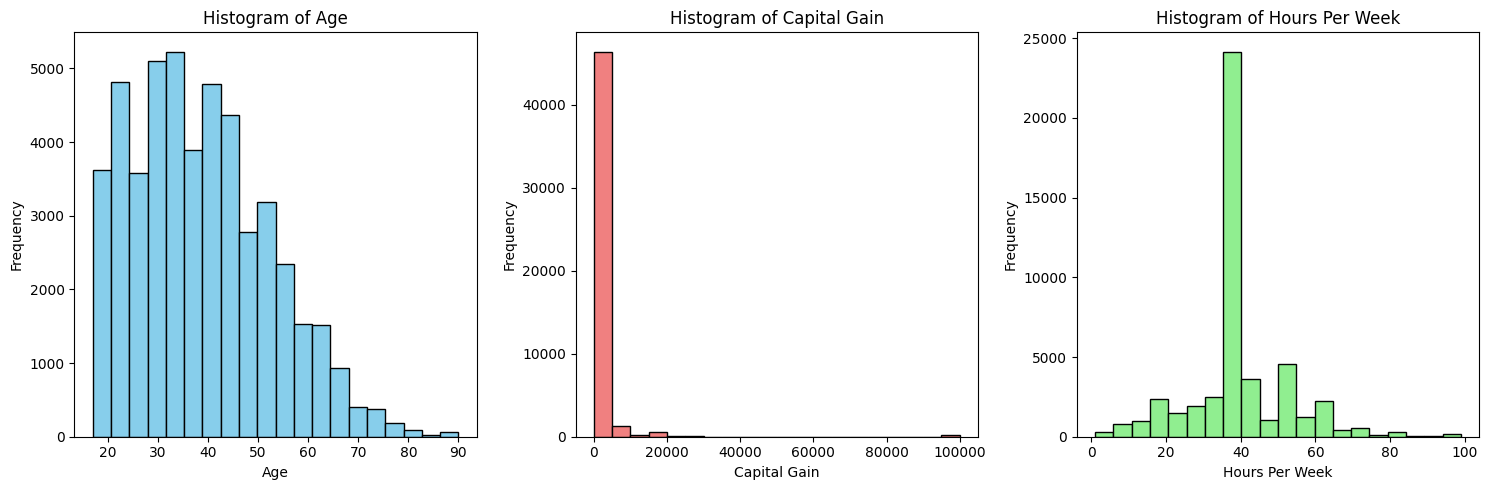

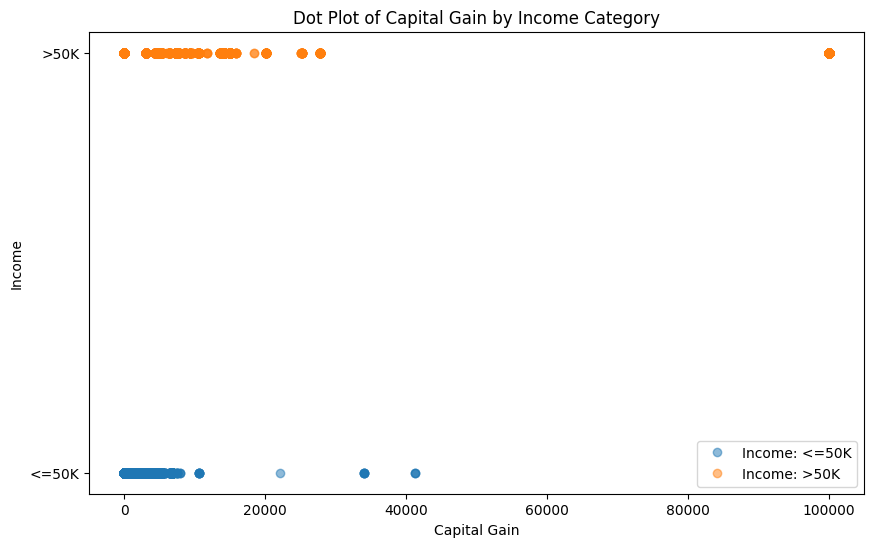

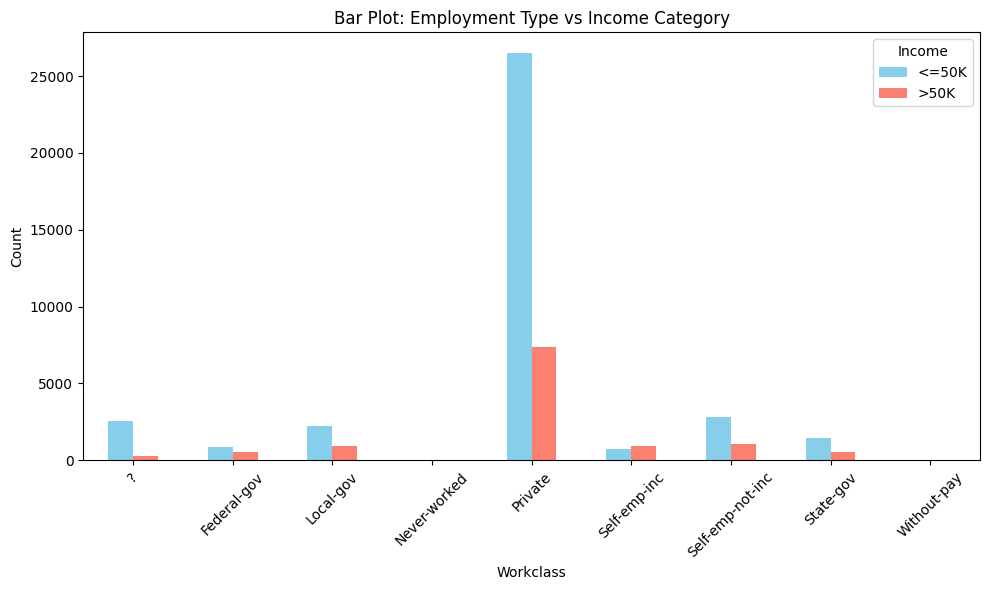

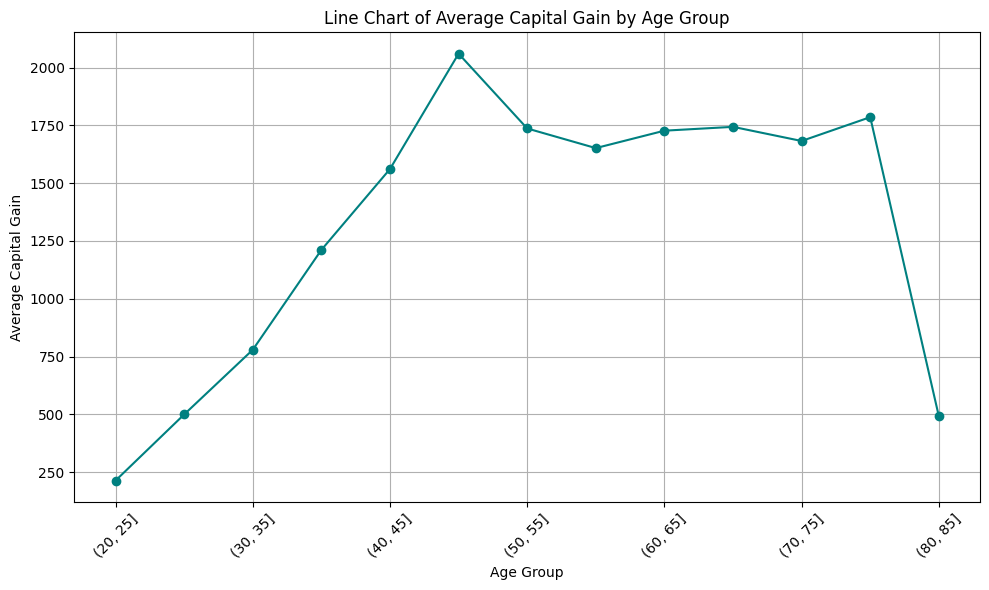

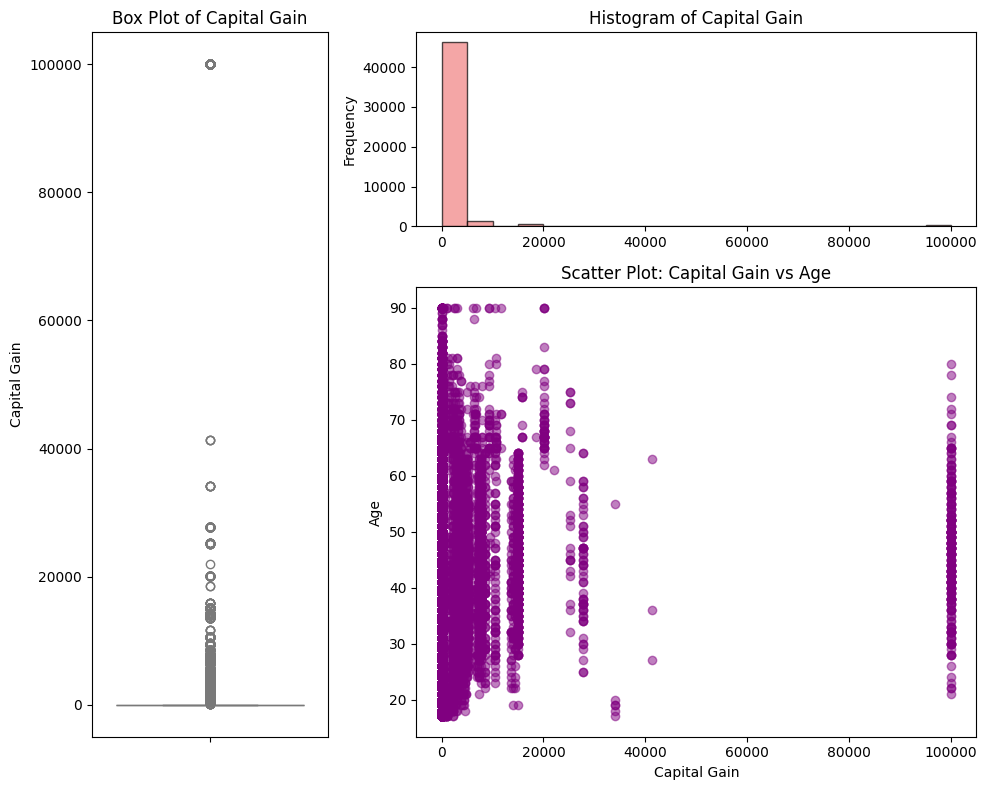

In [2]:

# Load dataset
df = pd.read_csv('adult_dataset.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.replace('-', '_').str.replace(' ', '_')

# Convert selected columns to numeric
cols_to_convert = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in those columns
df.dropna(subset=cols_to_convert, inplace=True)

# Histogram plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['capital_gain'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['hours_per_week'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Hours Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Dot plot of Capital Gain by Income Category
plt.figure(figsize=(10, 6))

for target_val in df['income'].unique():
    subset = df[df['income'] == target_val]
    plt.plot(subset['capital_gain'], [target_val]*len(subset), 'o', alpha=0.5, label=f'Income: {target_val}')

plt.title('Dot Plot of Capital Gain by Income Category')
plt.xlabel('Capital Gain')
plt.ylabel('Income')
plt.legend()
plt.show()

# Bar plot: Employment Type vs Income Category
employment_counts = df.groupby(['workclass', 'income']).size().unstack()
employment_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Bar Plot: Employment Type vs Income Category')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line chart: Average Capital Gain by Age Group
# Line chart: Average Capital Gain by Age Group
age_bins = pd.cut(df['age'], bins=range(20, 90, 5))
avg_gain_by_age = df.groupby(age_bins, observed=False)['capital_gain'].mean()

plt.figure(figsize=(10, 6))
avg_gain_by_age.plot(kind='line', marker='o', color='teal')
plt.title('Line Chart of Average Capital Gain by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Capital Gain')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Box Plot with Histogram and Scatter Plot
plt.figure(figsize=(10, 8))

# Box Plot
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3)
sns.boxplot(y=df['capital_gain'], color='lightblue', ax=ax1)
ax1.set_title('Box Plot of Capital Gain')
ax1.set_ylabel('Capital Gain')

# Histogram
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax2.hist(df['capital_gain'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_title('Histogram of Capital Gain')
ax2.set_ylabel('Frequency')

# Scatter Plot
ax3 = plt.subplot2grid((3, 3), (1, 1), rowspan=2, colspan=2)
ax3.scatter(df['capital_gain'], df['age'], alpha=0.5, color='purple')
ax3.set_title('Scatter Plot: Capital Gain vs Age')
ax3.set_xlabel('Capital Gain')
ax3.set_ylabel('Age')

plt.tight_layout()
plt.show()
